Dependancies

In [ ]:
pip install pyspark

     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 204kB 46.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=11806ed29af1c467da79cb821095ec1ebba736ad87797777dfeb0c8deb9d8553
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv('https://raw.githubusercontent.com/JDICKENSON91/Final-Project/data_clean/Data/Cleaned_Data/ABS_TVP_Cleaned.csv')
Age_Data = data[data.Code.eq('T01')]
Age_Data = Age_Data[Age_Data.Sex != 'Persons']
Age_Data = Age_Data[Age_Data.Age != 'All ages']
Age_Data['Age'] = Age_Data['Age'].astype(int)
Age_Data.head()

,Code Prefix,Code,Category,Sex,Age,2006,2011,2016
3,T01,T01,Age & Sex,Males,0,165,192,226
4,T01,T01,Age & Sex,Females,0,173,221,234
6,T01,T01,Age & Sex,Males,1,160,200,220
7,T01,T01,Age & Sex,Females,1,158,192,207
9,T01,T01,Age & Sex,Males,2,146,179,200


In [70]:
X = Age_Data[["2006", "2011","2016"]]
y = Age_Data["Age"].values.reshape(-1, 1)
print(X.shape, y.shape)

(86, 1) (86, 1)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.38021059753144726
Testing Score: 0.25824649665023625


Text(0.5, 1.0, 'Residual Plot')

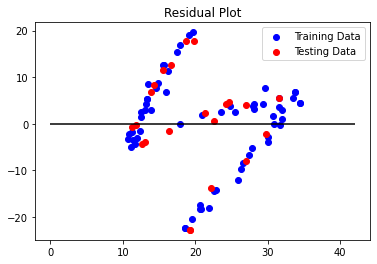

In [74]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [ ]:
Sex_Data = data[data.Code.eq('T01')]
Sex_Data['Sex Code'] = ''
Sex_Data = Sex_Data[Sex_Data.Sex != 'Persons']
Sex_Data = Sex_Data[Sex_Data.Age != 'All ages']
Sex_Data.loc[Sex_Data['Sex'] == 'Males', 'Sex Code'] = 1
Sex_Data.loc[Sex_Data['Sex'] == 'Females', 'Sex Code'] = 2
Sex_Data['Age'] = Sex_Data['Age'].astype(int)
Sex_Data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Code Prefix,Code,Category,Sex,Age,2006,2011,2016,Sex Code
3,T01,T01,Age & Sex,Males,0,165,192,226,1
4,T01,T01,Age & Sex,Females,0,173,221,234,2
6,T01,T01,Age & Sex,Males,1,160,200,220,1
7,T01,T01,Age & Sex,Females,1,158,192,207,2
9,T01,T01,Age & Sex,Males,2,146,179,200,1


In [ ]:
X = Sex_Data[["2006", "2011","2016"]]
y = Sex_Data["Sex Code"].values.reshape(-1, 1)
print(X.shape, y.shape)

(86, 3) (86, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04452428601372582
Testing Score: -0.08532956514321355


Text(0.5, 1.0, 'Residual Plot')

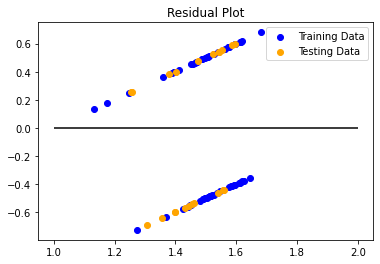

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [84]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=500, centers=3,
                            cluster_std=0.70, random_state=0)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)



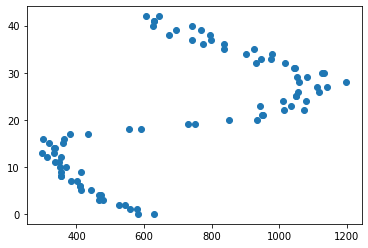

In [89]:
X = Sex_Data["2016"]+Sex_Data["2011"]+Sex_Data["2006"]
Y = Sex_Data["Age"]

plt.scatter(X,Y)
plt.show()

In [95]:
Sex_Data['combined'] = Sex_Data.apply(lambda x: list([x['2006'],
                                        x['2011'],
                                        x['2016']]),axis=1).tolist()     

In [96]:
Sex_Data['combined']

3      [165, 192, 226]
4      [173, 221, 234]
6      [160, 200, 220]
7      [158, 192, 207]
9      [146, 179, 200]
            ...       
125    [199, 274, 268]
126    [176, 219, 232]
127    [176, 202, 227]
129    [181, 231, 218]
130    [177, 234, 217]
Name: combined, Length: 86, dtype: object

ValueError: ignored

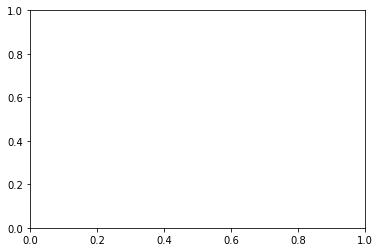

In [97]:
X = Sex_Data["combined"]
Y = Sex_Data["Age"]

plt.scatter(X,Y)
plt.show()

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)


ValueError: ignored

In [ ]:
plt.scatter(X,Y, c=predicted_clusters, s=50, cmap='viridis')
plt.show()